# PROJET ML — CLASSIFICATION DE VIDÉOS YOUTUBE *TRENDING*

**Dataset Kaggle**: https://www.kaggle.com/datasets/datasnaek/youtube-new

**Objectif**: Développer un classificateur pour prédire si une vidéo YouTube deviendra *trending*.

> Ce notebook est conçu pour être complété. Chaque section contient des consignes détaillées et des zones de code à compléter.


## 1. Importation des librairies

**Consigne 1.1 — Importez toutes les librairies nécessaires**
- `pandas`, `numpy` pour la manipulation de données  
- `matplotlib.pyplot`, `seaborn` pour la visualisation  
- `sklearn` pour le machine learning  
- `warnings` pour supprimer les avertissements

In [146]:
# VOTRE CODE ICI - Section 1.1
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn as sl
# Suppression des warnings
import warnings
warnings.filterwarnings('ignore')

## 2. Chargement et exploration des données

**Consigne 2.1 — Chargement des données**
- Chargez le fichier `USvideos.csv` avec pandas  
- Affichez les 5 premières lignes  
- Affichez les informations générales (`info()`, `shape`, `describe()`)

*Aide* :
- Utilisez `pd.read_csv()` avec `encoding='utf-8'`
- `.info()` donne les types de colonnes et valeurs non-nulles
- `.describe()` donne les statistiques descriptives

In [147]:
# VOTRE CODE ICI - Section 2.1

df= pd.read_csv('USvideos.csv', encoding='utf-8')
print("Premières lignes:")
display(df.head(1))
print("\nInformations générales:")
# <class 'pandas.core.frame.DataFrame'> : - DataFrame → class (le plan fourni par pandas pour créer des tableaux)
#                                           DataFrame est la classe : elle définit toutes les méthodes possibles (head(), describe(), shape, info(), etc.).
#                                          - df → object (ton tableau concret créé avec ce plan)
#                                            df est un objet : tu peux l’utiliser, l’afficher, filtrer des lignes, calculer des moyennes…
display(df.info())
print("Shape:", df.shape)
# Le tableau contient 40949 lignes et 16 colonnes
display(df.describe(include='all').transpose())
# Avec include='all' on demande à pandas d’essayer d’inclure toutes les colonnes (numériques, texte/objets, dates, booléens, catégories) sinon seulement les colonnes numériques
# Avec .transpose(), chaque ligne correspond à une colonne du DataFrame et chaque colonne correspond à une métrique. C’est souvent plus lisible quand tu as beaucoup de colonnes.

Premières lignes:


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...



Informations générales:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949

None

Shape: (40949, 16)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
video_id,40949,6351,j4KvrAUjn6c,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trending_date,40949,205,17.14.11,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,40949,6455,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
channel_title,40949,2207,ESPN,203,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category_id,40949.0,NaN,NaN,NaN,19.972429,7.568327,1.0,17.0,24.0,25.0,43.0
publish_time,40949,6269,2018-05-18T14:00:04.000Z,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tags,40949,6055,[none],1535,NaN,NaN,NaN,NaN,NaN,NaN,NaN
views,40949.0,NaN,NaN,NaN,2360784.638257,7394113.759704,549.0,242329.0,681861.0,1823157.0,225211923.0
likes,40949.0,NaN,NaN,NaN,74266.702435,228885.338209,0.0,5424.0,18091.0,55417.0,5613827.0
dislikes,40949.0,NaN,NaN,NaN,3711.400889,29029.705945,0.0,202.0,631.0,1938.0,1674420.0


**Consigne 2.2 — Analyse des valeurs manquantes**  
- Comptez les valeurs manquantes par colonne  
- Identifiez les colonnes avec le plus de valeurs manquantes  
- Affichez le pourcentage de valeurs manquantes

In [148]:
# VOTRE CODE ICI - Section 2.2
# #Valeurs manquantes
missing = df.isna().sum() #isna() est similaire à isnull() par contre isna() est la nouvelle convention pandas
#Valeurs manquantes en pourcentage = 1.39 % 
pct_missing = (missing / len(df)) * 100
print("Valeurs manquantes (nombre):")
display(missing)
print("\nValeurs manquantes (pourcentage):")
display(pct_missing)

Valeurs manquantes (nombre):


video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64


Valeurs manquantes (pourcentage):


video_id                  0.000000
trending_date             0.000000
title                     0.000000
channel_title             0.000000
category_id               0.000000
publish_time              0.000000
tags                      0.000000
views                     0.000000
likes                     0.000000
dislikes                  0.000000
comment_count             0.000000
thumbnail_link            0.000000
comments_disabled         0.000000
ratings_disabled          0.000000
video_error_or_removed    0.000000
description               1.391975
dtype: float64

**Consigne 2.3 — Exploration des catégories**  
- Chargez le fichier JSON des catégories (`US_category_id.json`)  
- Fusionnez avec le DataFrame principal  
- Affichez la distribution des catégories

*Aide* : La structure JSON est du type:  
`{"items": [{"id": "1", "snippet": {"title": "Film & Animation"}}, ...]}`

In [149]:
# VOTRE CODE ICI - Section 2.3
import pandas as pd
import json
categories_raw = pd.read_json('US_category_id.json') # Transforme le fichier Json imbriqué en DataFrame
print(type(categories_raw['items'])) # type series Pandas (colonne d'un tableau avec son index): on peut utiliser certaine méthode : .mean(), .describe(), .isna()
items = categories_raw['items'].tolist() # Transforme une Series pandas (colonne avec index) en liste Python (juste les valeurs, plus simple).
print(type(items)) # liste Python = juste les valeurs, sans index, sans méthodes pandas avancées : Pas de .mean(), .describe(), .isna() sur une liste → tu dois tout programmer toi-même.
display(items)
category_dict = {int(item['id']): item['snippet']['title'] for item in items} # On transforme la clé item['id']string en int, ensuite on boucle afin d'extraire chaque valeur item['title'] et son ID
print(category_dict)
cat_df = pd.DataFrame(list(category_dict.items()), columns=['category_id', 'category_title'])

        # .items() → récupère toutes les paires clé/valeur d’un dictionnaire.
        # list(...) → transforme ça en une liste de tuples.
        # pd.DataFrame(...) → transforme cette liste en tableau (DataFrame).
        # columns=[...] → donne des noms clairs aux colonnes.
        # Donc au lieu d’avoir un dictionnaire, on a un tableau pandas prêt pour l’analyse de données.
"""
dict = parfait pour accéder rapidement à une valeur avec une clé.
DataFrame = parfait pour analyser, trier, fusionner avec d’autres données.
Un DataFrame pandas est comme une table Excel :tu peux trier,filtrer,fusionner avec d’autres données,sauvegarder facilement en CSV, JSON, SQL, etc.
category_dict = version “Python pure” (rapide, simple)
cat_df = version “pandas” (prête pour l’analyse et la manipulation tabulaire)
On fait ça car pandas travaille avec des DataFrames."""

df_merged = df.merge(       # Prends df, on lui ajoute les colonnes de cat_df en utilisant la correspondance entre les category_id.
    cat_df,                 # le tableau avec lequel on fusionne
    how='left',             # type de jointure
    left_on='category_id',  # table de gauche
    right_on='category_id'  # table de droite
    )

print("Distribution des catégories:")
display(df_merged['category_title'] # on veut un tableau qui te dit combien de vidéos par catégorie
        .value_counts()             # fait un dénombrement des valeurs uniques sur category_title.
        .to_frame('count')          # transforme le résultat en DataFrame avec une colonne nommée "count".
        )


<class 'pandas.core.series.Series'>
<class 'list'>


[{'kind': 'youtube#videoCategory',
  'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
  'id': '1',
  'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
   'title': 'Film & Animation',
   'assignable': True}},
 {'kind': 'youtube#videoCategory',
  'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
  'id': '2',
  'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
   'title': 'Autos & Vehicles',
   'assignable': True}},
 {'kind': 'youtube#videoCategory',
  'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
  'id': '10',
  'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
   'title': 'Music',
   'assignable': True}},
 {'kind': 'youtube#videoCategory',
  'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-oBJavSGkfDI"',
  'id': '15',
  'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
   'title': 'Pets & Animals',
   'assignable': True}},
 {'kind': 'youtube#videoCategory',
  'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/9GQMSRjrZdHe

{1: 'Film & Animation', 2: 'Autos & Vehicles', 10: 'Music', 15: 'Pets & Animals', 17: 'Sports', 18: 'Short Movies', 19: 'Travel & Events', 20: 'Gaming', 21: 'Videoblogging', 22: 'People & Blogs', 23: 'Comedy', 24: 'Entertainment', 25: 'News & Politics', 26: 'Howto & Style', 27: 'Education', 28: 'Science & Technology', 29: 'Nonprofits & Activism', 30: 'Movies', 31: 'Anime/Animation', 32: 'Action/Adventure', 33: 'Classics', 34: 'Comedy', 35: 'Documentary', 36: 'Drama', 37: 'Family', 38: 'Foreign', 39: 'Horror', 40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42: 'Shorts', 43: 'Shows', 44: 'Trailers'}
Distribution des catégories:


,count
category_title,
Entertainment,9964
Music,6472
Howto & Style,4146
Comedy,3457
People & Blogs,3210
News & Politics,2487
Science & Technology,2401
Film & Animation,2345
Sports,2174


## 3. Nettoyage des données

**Consigne 3.1 — Nettoyage des données**
- Supprimez les doublons basés sur `video_id`  
- Gérez les valeurs manquantes dans `description` (remplacez par string vide)  
- Convertissez `publish_time` en datetime  
- Supprimez les lignes avec des valeurs aberrantes (ex: `views` négatives)

In [150]:
# VOTRE CODE ICI - Section 3.1
df_clean = df_merged.drop_duplicates(subset='video_id').copy() # Supprimez les doublons basés sur `video_id` 
df_clean['description'] = df_clean['description'].fillna('') # Remplacer les valeurs manquantes de la colonne description par une string vide

""" Actuellement le format actuelle sur df_clean est sous forme : 2017-11-13T17:13:01.000Z, c'est le format format ISO 8601. 
    Pandas le considère comme un objet. 
    Pour faire des calculs sur les dates (trier, filtrer, extraire l’année, le mois…), il faut la convertir en datetime.
"""
print(df_clean['publish_time'].dtype)

# Convertissez `publish_time` en datetime  
df_clean['publish_time'] =  pd.to_datetime(df_clean['publish_time'], errors='coerce') 
"""
errors='coerce' est très utile pour : 
- Nettoyer des colonnes numériques avec des chaînes “sales”. 
- Transformer des dates mal formatées en datetime  Ex: ["2023-01-01", "invalide", "2023-03-15"] -> 2023-01-01 NaT(Not a Time) 2023-03-15.
- Eviter que pandas bloque avec une erreur.

"""
df_clean = df_clean.dropna(subset=['publish_time']) # sert à supprimmer les lignes où publish_time est manquant (NaT après conversion en datetime).

# Supprimez les lignes avec des valeurs aberrantes (ex: `views` négatives)
df_clean = df_clean[(df_clean['views'] >= 0) & (df_clean['likes'] >= 0) & (df_clean['dislikes'] >= 0) & (df_clean['comment_count'] >= 0)]
print((df_clean.select_dtypes(include='number') < 0).sum()) #On vérifie dans les colonnes de type number s'il y'a des valeurs négatifs



object
category_id      0
views            0
likes            0
dislikes         0
comment_count    0
dtype: int64


## 4. Feature Engineering

Le Feature Engineering (ou création de variables) est l’art de transformer et enrichir les données brutes pour que les modèles de Machine Learning puissent mieux apprendre.

Pourquoi c’est important ?
- Les modèles ne comprennent que les nombres. Ils ne savent pas deviner des relations ou des patterns complexes dans des colonnes brutes (ex : des   
  dates, des textes ou des catégories).

- De bonnes features améliorent la performance du modèle.

- De mauvaises features peuvent faire baisser la précision ou même tromper le modèle.

**Consigne 4.1 — Variables d'engagement**
** définition : https://support.google.com/youtube/answer/2991785?hl=fr**

Les métriques d'engagement sur YouTube (vues, "J'aime", "Je n'aime pas" et abonnements) représentent le nombre d'interactions enregistrées sur une vidéo ou une chaîne. Elles constituent un indicateur important pour mesurer la popularité générale de votre vidéo ou de votre chaîne.

In [151]:
# VOTRE CODE ICI - Section 4.1
import numpy as np
eps = 1e-9       # eps = 0.000000001 est une valeur très petite pour éviter la division par zéro. Ex: si views = 0, Python plante avec ZeroDivisionError.

# Nombre total de réactions (likes + dislikes).
denom = df_clean['likes'] + df_clean['dislikes'] 

# Ratio de "like" par rapport aux interactions
df_clean['like_ratio'] = np.where(denom > 0, df_clean['likes'] / denom, 0)
"""
    np.where(condition, valeur_si_vrai, valeur_si_faux) → équivalent d’un if vectorisé :
    Si denom > 0 → calculer likes / denom
    Sinon → mettre 0 (aucune interaction)

"""
# Taux d’engagement global
df_clean['engagement_rate'] = np.where(df_clean['views'] > 0,
                                      (df_clean['likes'] + df_clean['dislikes'] + df_clean['comment_count']) / (df_clean['views'] + eps),
                                       0)
"""
    Avec la condition views > 0, eps n’est pas strictement nécessaire.
    eps est là pour prévenir toute division par zéro accidentelle, notamment dans des calculs plus complexes ou sur des colonnes float,
    il peut y avoir des vues très proches de zéro ou des flottants arrondis à zéro (0.0).

"""
# Commentaires par vue
df_clean['comments_per_view'] = np.where(df_clean['views'] > 0, df_clean['comment_count'] / (df_clean['views'] + eps), 0)

display(df_clean)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_title,like_ratio,engagement_rate,comments_per_view
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,0.950970,0.102151,0.021318
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment,0.940521,0.047972,0.005252
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy,0.964729,0.049994,0.002563
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment,0.938550,0.037836,0.006253
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,0.985181,0.072405,0.008359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40760,dS5Thrl-4Kc,18.14.06,CRAYOLA MAKEUP | HIT OR MISS?,Laura Lee,26,2018-06-12 18:55:26+00:00,"Laura88Lee|""crayola""|""crayon makeup""|""crayola ...",607422,26166,895,3517,https://i.ytimg.com/vi/dS5Thrl-4Kc/default.jpg,False,False,False,"Hey Larlees, todays video is me testing Crayol...",Howto & Style,0.966927,0.050341,0.005790
40761,JGm9Y_hFqNk,18.14.06,First Take reacts: Kyrie Irving says contract ...,ESPN,17,2018-06-13 15:06:08+00:00,"espn|""espn live""|""boston celtics""|""kyrie irvin...",812832,7701,320,2505,https://i.ytimg.com/vi/JGm9Y_hFqNk/default.jpg,False,False,False,First Take's Stephen A. Smith and Max Kellerma...,Sports,0.960105,0.012950,0.003082
40762,6h8QgZF5Qu4,18.14.06,Drop the Mic w/ Ashton Kutcher & Sean Diddy Combs,The Late Late Show with James Corden,24,2018-06-13 05:27:27+00:00,"The Late Late Show|""Late Late Show""|""James Cor...",864189,18811,399,1074,https://i.ytimg.com/vi/6h8QgZF5Qu4/default.jpg,False,False,False,James Corden and Ashton Kutcher square off in ...,Entertainment,0.979230,0.023472,0.001243
40764,mpnshdmtE2Y,18.14.06,Carla Makes BA Smashburgers | From the Test Ki...,Bon Appétit,26,2018-06-12 16:03:58+00:00,"bon appetit|""burgers""|""cheeseburgers""|""how to ...",540149,14206,693,1211,https://i.ytimg.com/vi/mpnshdmtE2Y/default.jpg,False,False,False,"Ground chuck is a great all-purpose, buy-it-an...",Howto & Style,0.953487,0.029825,0.002242


### Visualiser les top N vidéos par métrique


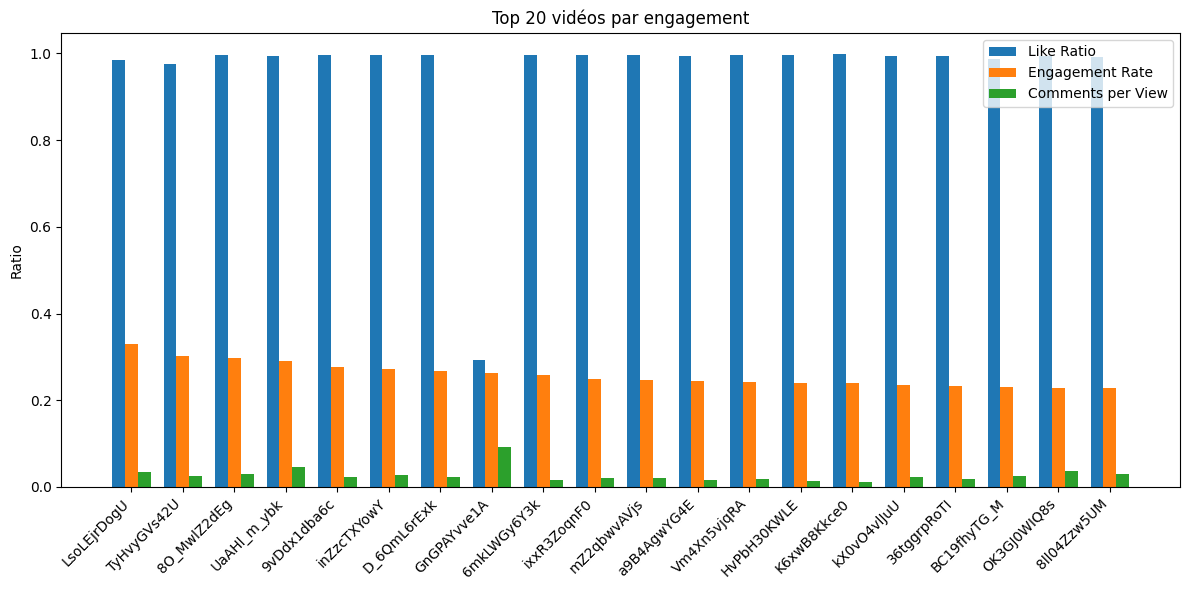

In [152]:

# Trier par engagement_rate et garder les 20 meilleures
top_videos = df_clean.sort_values('engagement_rate', ascending=False).head(20)

# Bar plot
plt.figure(figsize=(12,6))
x = np.arange(len(top_videos['video_id']))
width = 0.25

plt.bar(x - width, top_videos['like_ratio'], width, label='Like Ratio')
plt.bar(x, top_videos['engagement_rate'], width, label='Engagement Rate')
plt.bar(x + width, top_videos['comments_per_view'], width, label='Comments per View')

plt.xticks(x, top_videos['video_id'], rotation=45, ha='right')
plt.ylabel('Ratio')
plt.title('Top 20 vidéos par engagement')
plt.legend()
plt.tight_layout()
plt.show()


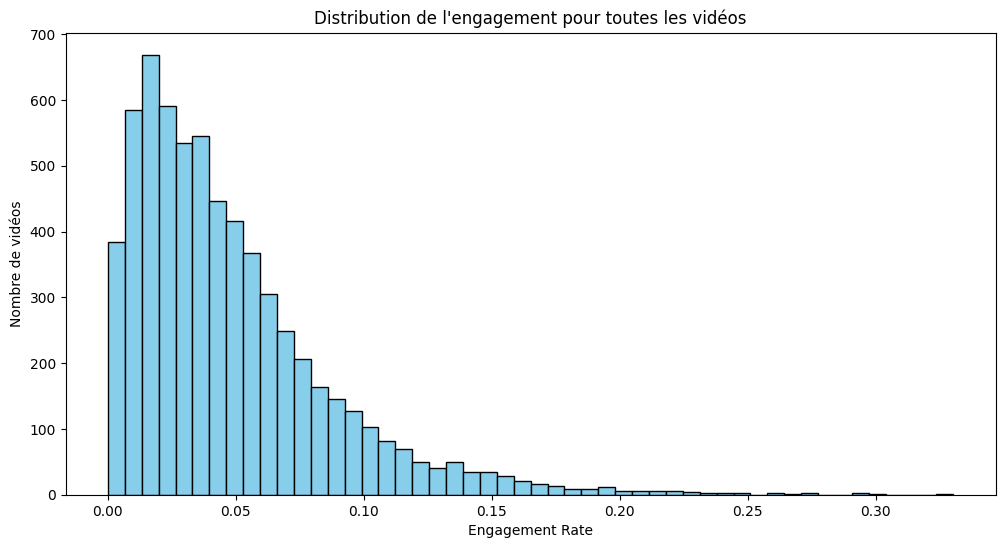

In [153]:
# Distribution générale avec histogrammes pour voir toutes les vidéos
plt.figure(figsize=(12,6))
plt.hist(df_clean['engagement_rate'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Engagement Rate')
plt.ylabel('Nombre de vidéos')
plt.title('Distribution de l\'engagement pour toutes les vidéos')
plt.show()


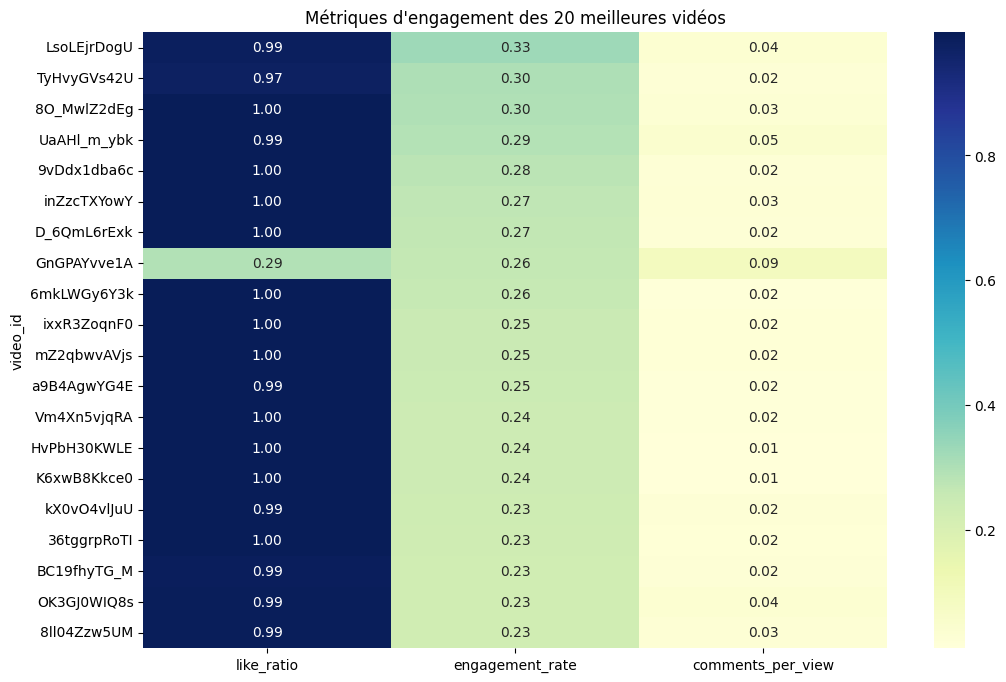

In [154]:
# Top 20 heatmap : on compare toutes les métriques ensemble pour les meilleures vidéos :

top_videos_metrics = top_videos[['video_id', 'like_ratio', 'engagement_rate', 'comments_per_view']]
top_videos_metrics = top_videos_metrics.set_index('video_id')

plt.figure(figsize=(12,8))
sb.heatmap(top_videos_metrics, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Métriques d\'engagement des 20 meilleures vidéos')
plt.show()


**Consigne 4.2 — Variables temporelles** : 

Elles permettent de :

Analyser la saisonnalité :
Quels mois ou jours génèrent le plus d’engagement ?

Analyser les tendances :
L’engagement augmente-t-il avec le temps ?
Extraire des parties du temps pour mieux comprendre le comportement des utilisateurs :Heure de publication, jour de la semaine, mois, trimestre, année,etc.

In [155]:
# VOTRE CODE ICI - Section 4.2
df_clean['publish_hour'] = df_clean['publish_time'].dt.hour
df_clean['publish_day_of_week'] = df_clean['publish_time'].dt.day_of_week
df_clean['publish_month'] = df_clean['publish_time'].dt.month
display(df_clean[['publish_day_of_week','publish_time']])

"""
L’idée, c’est de rendre l’information plus exploitable pour l’analyse et la modélisation.
1. Faciliter les regroupements et visualisations

Si tu veux savoir quel jour de la semaine les vidéos sont le plus souvent publiées :
  Tu ne peux pas directement grouper sur une colonne publish_time (trop granulaire, chaque date est unique).
  Mais si tu crées publish_day_of_week, tu peux faire un simple groupby et un barplot. 

Les algorithmes de ML ne savent pas deviner tout seuls que dans une date il y a une saisonnalité, des jours de la semaine, etc.
On décompose publish_time en features pour donner ces indices au modèle.

publish_hour → capter si les vidéos publiées le soir performent mieux.
publish_day_of_week → voir si les vidéos de tel jour attirent plus.
publish_month → analyser la saisonnalité.
"""

df_clean['publish_hour'] = df_clean['publish_time'].dt.hour
df_clean['publish_day_of_week'] = df_clean['publish_time'].dt.day_of_week
df_clean['publish_month'] = df_clean['publish_time'].dt.month
display(df_clean[['publish_day_of_week','publish_time']])
print((df_clean['publish_month'] == 7).sum())

,publish_day_of_week,publish_time
0,0,2017-11-13 17:13:01+00:00
1,0,2017-11-13 07:30:00+00:00
2,6,2017-11-12 19:05:24+00:00
3,0,2017-11-13 11:00:04+00:00
4,6,2017-11-12 18:01:41+00:00
...,...,...
40760,1,2018-06-12 18:55:26+00:00
40761,2,2018-06-13 15:06:08+00:00
40762,2,2018-06-13 05:27:27+00:00
40764,1,2018-06-12 16:03:58+00:00


,publish_day_of_week,publish_time
0,0,2017-11-13 17:13:01+00:00
1,0,2017-11-13 07:30:00+00:00
2,6,2017-11-12 19:05:24+00:00
3,0,2017-11-13 11:00:04+00:00
4,6,2017-11-12 18:01:41+00:00
...,...,...
40760,1,2018-06-12 18:55:26+00:00
40761,2,2018-06-13 15:06:08+00:00
40762,2,2018-06-13 05:27:27+00:00
40764,1,2018-06-12 16:03:58+00:00


4


### Visualisation en rapport avec le temps

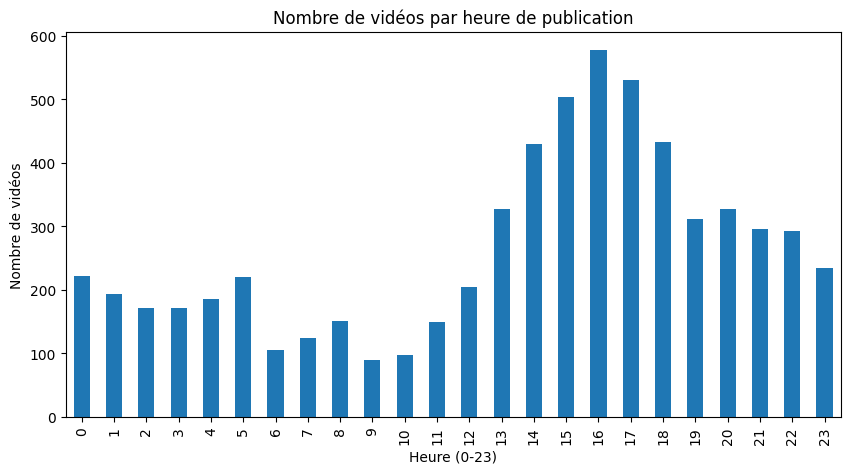

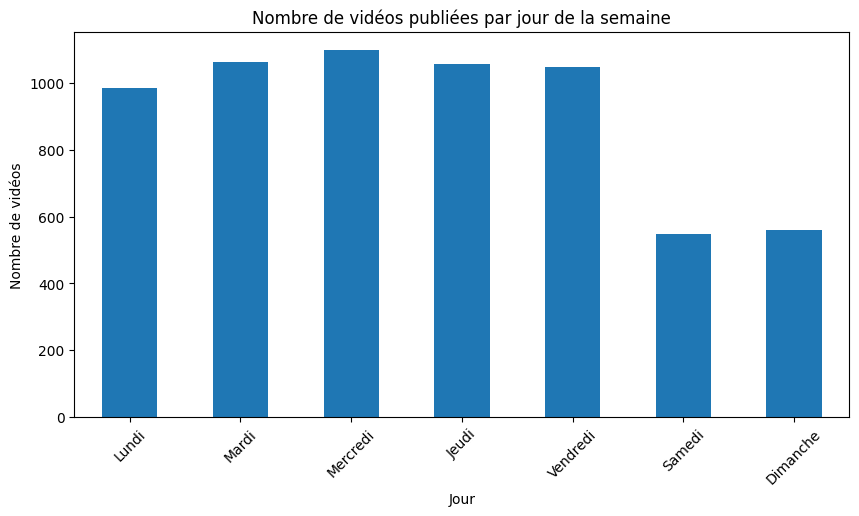

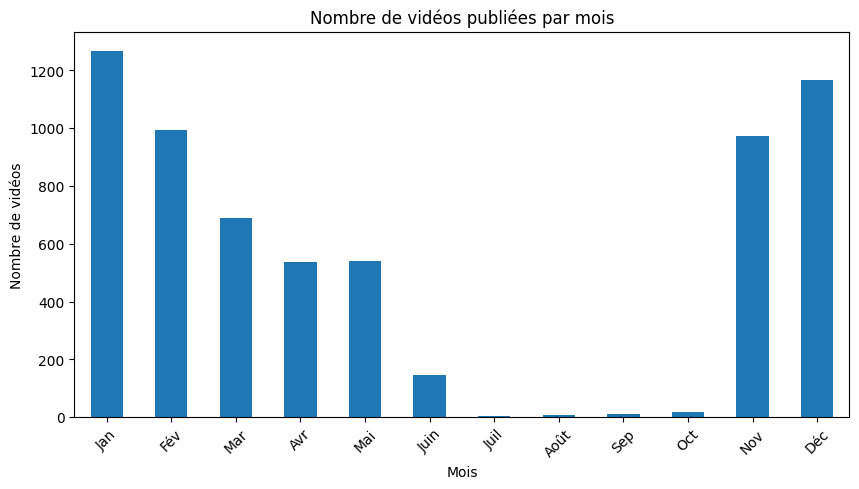

In [156]:
import matplotlib.pyplot as plt

# Histogramme : Nombre de vidéos par heure
plt.figure(figsize=(10,5))
df_clean['publish_hour'].value_counts().sort_index().plot(kind='bar')
plt.title("Nombre de vidéos par heure de publication")
plt.xlabel("Heure (0-23)")
plt.ylabel("Nombre de vidéos")
plt.show()

# Histogramme : Nombre de vidéos par jour de la semaine
jours = ['Lundi','Mardi','Mercredi','Jeudi','Vendredi','Samedi','Dimanche']
plt.figure(figsize=(10,5))
df_clean['publish_day_of_week'].value_counts().sort_index().plot(kind='bar')
plt.title("Nombre de vidéos publiées par jour de la semaine")
plt.xlabel("Jour")
plt.ylabel("Nombre de vidéos")
plt.xticks(range(7), jours, rotation=45)
plt.show()

mois = ['Jan','Fév','Mar','Avr','Mai','Juin','Juil','Août','Sep','Oct','Nov','Déc']

# Comptage par mois, avec reindex pour inclure tous les mois 1 à 12
counts = df_clean['publish_month'].value_counts().sort_index().reindex(range(1,13), fill_value=0)

plt.figure(figsize=(10,5))
counts.plot(kind='bar')
plt.title("Nombre de vidéos publiées par mois")
plt.xlabel("Mois")
plt.ylabel("Nombre de vidéos")
plt.xticks(range(12), mois, rotation=45)
plt.show()


**Consigne 4.3 — Variables textuelles (titre)**

In [157]:
# VOTRE CODE ICI - Section 4.3
s = df_clean['title'].fillna('')  # évite que 'NaN' soit compté comme texte

# Longueur du titre (en caractères)
df_clean['title_length'] = s.str.len() # calcule la longueur en caractères de chaque titre

# Nombre de mots dans le titre
df_clean['title_word_count'] = (s.str
                    .split()           # coupe chaque titre en mots (par défaut sur les espaces) 
                    .str               # un “accès spécial” qui te donne plein de méthodes de chaînes de caractères, mais appliquées à toute la colonne d’un coup.
                    .len())            # compte combien d’éléments dans cette liste

# Présence de « beaucoup » de majuscules (plus de 3)
df_clean['has_caps'] = (s.str.contains(r'[A-Z]{3,}', regex=True) # vérifie si le titre contient au moins 3 lettres MAJUSCULES consécutives.
                        .astype(int))                            # convertit True/False en 1/0.

# Présence de chiffres dans le titre
df_clean['has_numbers'] = (s.str.contains(r'\d', regex=True)     # vérifie si le titre contient des chiffres
                           .astype(int))                         # convertit True/False en 1/0.


#### Explication des features créées : ####

title_length
→ Longueur du titre en caractères (utile pour voir si les titres courts/longs attirent plus de vues).

title_word_count
→ Nombre de mots dans le titre (ex. un titre de 10 mots contre un titre de 3 mots).

has_caps
→ Variable binaire : est-ce qu’un titre contient beaucoup de majuscules ? (souvent utilisé pour attirer l’attention : "OMG YOU WON’T BELIEVE THIS").

has_numbers
→ Variable binaire : est-ce qu’un titre contient des chiffres ? (souvent lié à des formats type "Top 10", "5 astuces").

## 5. Création de la variable cible  ( Target )

**Consigne 5.1 — Définition de `is_trending`**  
- Une vidéo est *trending* si elle a plus de vues que le 80e percentile de sa catégorie

In [158]:
# VOTRE CODE ICI - Section 5.1
df_clean['is_trending'] = ((df_clean.groupby('category_id')['views'] # regroupe le DataFrame par category_id. Pour chaque catégorie, on prend uniquement la colonne views
                                  .transform(lambda x: x > x         # renvoie un tableau de True/False indiquant si chaque vidéo dépasse ce seuil.
                                  .quantile(0.8)))                   # calcule le 80ᵉ percentile (le seuil de "top 20%" des vues).
                                  .astype(int))                      # convertit les booléens True/False en 1 et 0.

print("Distribution de la variable cible:")
display((df_clean['is_trending']
         .value_counts()        # compte combien de vidéos ont is_trending = 0 et combien ont is_trending = 1.
         .to_frame('count')     # transforme le résultat (une Series) en tableau (DataFrame) avec une colonne nommée count.
         ))

Distribution de la variable cible:


,count
is_trending,
0,5078
1,1273


## 6. Préparation des données pour l'entraînement

**Consignes 6.1 & 6.2 — Sélection des features & split train/test**

In [159]:
# VOTRE CODE ICI - Section 6.1 et 6.2
# import
from sklearn.model_selection import train_test_split

# selectionne les colonnes pertinentes pour prédire is_trending
features = ['views', 'likes', 'dislikes', 'comment_count',
             'like_ratio', 'engagement_rate', 'title_length', 'publish_hour', 'category_id',
             ]

X = df_clean[features].copy()         # matrice des features (X)
y = df_clean['is_trending'].copy()    # variable cible (y)

#....... Split train/test ........
X_train, X_test, y_train, y_test = train_test_split (
        X, y,
        test_size = 0.2,    # 20% test, 80% train
        random_state=42,    # pour reproductibilité
        stratify=y          # Conserve la même proportion de trending/non-trendingDataset complet : 
                            # exemple : 
                            # Train : 80 vidéos → 16 trending (20%) et 64 non-trending (80%).
                            # Test : 20 vidéos → 4 trending (20%) et 16 non-trending (80%).
)
# ......

print(f"Taille train: {X_train.shape}")
print(f"Taille test: {X_test.shape}")

Taille train: (5080, 9)
Taille test: (1271, 9)


### Standardisation des données

Les colonnes numériques (views, likes, comment_count, etc.) n’ont pas la même échelle.

Exemple :

 - views peut aller jusqu’à plusieurs millions

 - like_ratio est entre 0 et 1

 - publish_hour va de 0 à 23

Si on ne normalise pas, certaines variables (comme views) vont « écraser » les autres, car elles ont des valeurs énormes.

### scaler = StandardScaler()

On crée un objet scaler, un outil qui va apprendre à recentrer et réduire les données.

Concrètement :

il calcule la moyenne et l’écart-type de chaque colonne (dans num_cols) puis, il appliquera la formule :

        𝑋 𝑠𝑐𝑎𝑙𝑒𝑑 = (𝑋 − 𝜇) / 𝜎 où μ est la moyenne et σ l’écart-type.

On entraîne le scaler sur le train uniquement (jamais sur le test ).

Parce qu’on doit simuler une situation réelle : le modèle ne connaît pas encore les données de test.

Donc le scaler apprend uniquement à partir de X_train.

À cette étape, le scaler mémorise :

 - la moyenne (μ) de chaque colonne,

 - l’écart-type (σ) de chaque colonne.

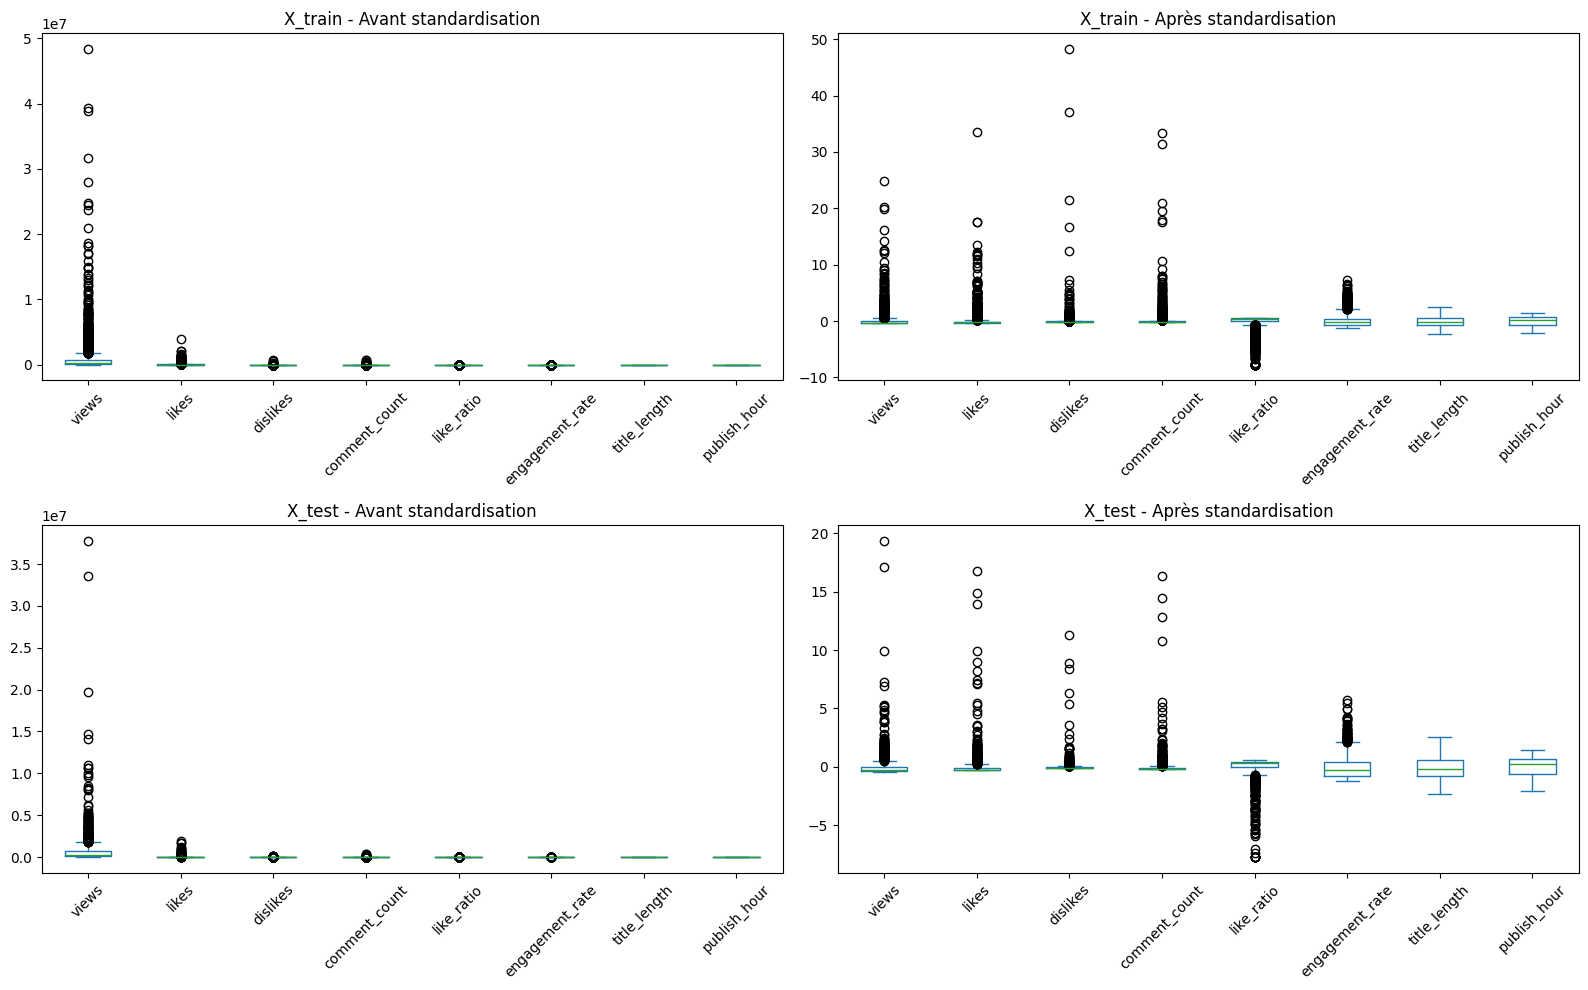

Taille train: (5080, 9)
Taille test: (1271, 9)


In [160]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

# --- Ton code de normalisation ---
scaler = StandardScaler()

num_cols = ['views', 'likes', 'dislikes', 'comment_count', 
            'like_ratio', 'engagement_rate', 'title_length', 'publish_hour']

# On garde une copie "avant" pour comparer
X_train_before = X_train[num_cols].copy()
X_test_before = X_test[num_cols].copy()

# Fit uniquement sur le train
scaler.fit(X_train[num_cols])

# Transformation
X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols]  = scaler.transform(X_test[num_cols])

# --- VISUALISATION ---
fig, axes = plt.subplots(2, 2, figsize=(16,10))

# Train avant
X_train_before.plot(kind="box", ax=axes[0,0])
axes[0,0].set_title("X_train - Avant standardisation")
axes[0,0].tick_params(axis='x', rotation=45)

# Train après
X_train[num_cols].plot(kind="box", ax=axes[0,1])
axes[0,1].set_title("X_train - Après standardisation")
axes[0,1].tick_params(axis='x', rotation=45)

# Test avant
X_test_before.plot(kind="box", ax=axes[1,0])
axes[1,0].set_title("X_test - Avant standardisation")
axes[1,0].tick_params(axis='x', rotation=45)

# Test après
X_test[num_cols].plot(kind="box", ax=axes[1,1])
axes[1,1].set_title("X_test - Après standardisation")
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Vérifie les tailles
print(f"Taille train: {X_train.shape}")
print(f"Taille test: {X_test.shape}")



## 7. Modèle 1 — Random Forest

On a déja standardisé les données numériques avec StandardScaler.
Ça ramène toutes les colonnes sur une même échelle (par ex. likes ~0.5, dislikes ~-0.2).
Pourquoi ?

Les arbres en Random Forest n’en ont pas vraiment besoin (ils découpent sur des seuils).

Mais on  veux comparer plus tard avec d’autres modèles (Logistic Regression, SVM), c’est bien d’avoir déjà cette étape.

**Consigne 7.1 — Entraînement**

In [161]:
# VOTRE CODE ICI - Section 7.1
# Import du modèle Random Forest de scikit-learn
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(
    max_depth= 100,                 # nombre d’arbres dans la forêt
    random_state=42,                # fixe l’aléatoire pour avoir toujours les mêmes résultats quand on relance.
    n_jobs=-1                       # mode mode turbo, tu choisis tous les cœurs du CPU à donner à scikit-learn
)

# Entrainement du modèle
rf_model.fit(X_train, y_train)

"""
Le modèle reçoit :
    X_train = les caractéristiques (features).
    y_train = les vraies étiquettes (0 ou 1).

La forêt construit 100 arbres de décision (par défaut).

Chaque arbre apprend à séparer les vidéos trending des non-trending avec des règles simples comme :
    "Si views > 10000 et like_ratio > 0.8 → trending"
    "Sinon, si comment_count < 50 → pas trending"

Puis la forêt combine les votes de tous les arbres → la majorité gagne.
""" 
# Prédire sur le jeu de test
y_predictions = rf_model.predict(X_test)


**Consigne 7.2 — Évaluation**

### Accuracy: proportion de prédictions correctes.

Formule :
Accuracy = 𝑇rue𝑃ositif + 𝑇rue𝑁égatif / 𝑇𝑃 + 𝑇𝑁 + 𝐹alse𝑃ositif + 𝐹alse𝑁égatif	​

Interprétation : sur 100 vidéos, combien le modèle a bien classées (trending ou non-trending).

Limite : si tes classes sont déséquilibrées (ex. 90% de vidéos non-trending), le modèle peut avoir une bonne accuracy même en prédisant tout le temps “non-trending”.

### Precision score : parmi toutes les vidéos que le modèle prédit “trending”, combien le sont vraiment ?

Formule :
Precision = 𝑇𝑃 / 𝑇𝑃 + 𝐹𝑃

Interprétation : “Quand mon modèle dit trending, est-ce qu’il a raison ?”

Utile quand les faux positifs coûtent cher (ex. tu veux être sûr avant de pousser une vidéo comme “tendance”).

### Recall : parmis toutes les vraies vidéos “trending”, combien le modèle a bien détectées ?

Formule :
Rappel = 𝑇𝑃 / 𝑇𝑃 + 𝐹𝑁

Interprétation : “Est-ce que je loupe beaucoup de vraies vidéos trending ?”

Utile quand les faux négatifs coûtent cher (ex. ne pas rater une vidéo qui aurait dû être dans les tendances).

### F1 score : moyenne harmonique de la précision et du rappel.

Formule :

𝐹1 = 2 × ( Precision × Rappel / Precision + Rappel)

Interprétation : équilibre entre précision et rappel.

Utile quand tu veux un compromis entre ne pas avoir trop de faux positifs et ne pas rater trop de vrais trending.

Random Forest - Résultats:
Accuracy : 0.9717
Precision: 0.9582
Recall   : 0.8980
F1-Score : 0.9271


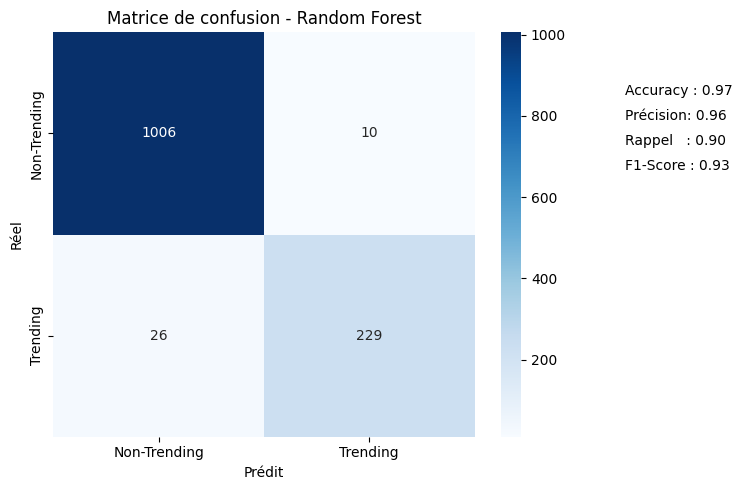

In [162]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix
)

# --- Scores ---
acc = accuracy_score(y_test, y_predictions)
prec = precision_score(y_test, y_predictions)
rec = recall_score(y_test, y_predictions)
f1 = f1_score(y_test, y_predictions)

print("Random Forest - Résultats:")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-Score : {f1:.4f}")

# --- Matrice de confusion ---
cm = confusion_matrix(y_test, y_predictions)

plt.figure(figsize=(6,5))
sb.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Non-Trending", "Trending"],
            yticklabels=["Non-Trending", "Trending"])

plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion - Random Forest")

# --- Ajouter les scores dans la figure ---
plt.figtext(1.05, 0.8, f"Accuracy : {acc:.2f}", fontsize=10)
plt.figtext(1.05, 0.75, f"Précision: {prec:.2f}", fontsize=10)
plt.figtext(1.05, 0.70, f"Rappel   : {rec:.2f}", fontsize=10)
plt.figtext(1.05, 0.65, f"F1-Score : {f1:.2f}", fontsize=10)

plt.tight_layout()
plt.show()


Une grille 2x2 (matrice de confusion) avec les nombres :

en haut à gauche : TN

en haut à droite : FP

en bas à gauche : FN

en bas à droite : TP

À droite de la grille, les scores (accuracy, precision, recall, F1) bien affichés.

### ***l’importance des variables ?***

Chaque arbre de la forêt prend des décisions basées sur certaines colonnes.

La forêt peut calculer quelle colonne contribue le plus à la prédiction.

Cela permet de :

 - comprendre le modèle (“quelles features influencent le plus la trending ?”)

 - réduire le nombre de colonnes si certaines sont peu importantes

 - expliquer le modèle à d’autres personnes

In [163]:
# # Importance des variables
feature_importance = (pd.DataFrame({                 # on met les deux listes (features et importances) dans un tableau facile à lire.
     'feature': X.columns,                           # X = df_clean[features].copy() # matrice des features (X) : colonnes choisis précédements
     'importance': rf_model.feature_importances_})   # feature_importances_ est un array numpy qui contient l’importance de chaque feature utilisée par le modèle.
                #array avec un score pour chaque feature : 
                # plus la valeur est élevée → plus la colonne a été utilisée pour prendre des décisions importantes dans la forêt.
                #Les valeurs sont normalisées : la somme = 1.
.sort_values('importance', ascending=False))   # trie du plus important au moins important.

print("\nTop 10 variables importantes:")
display(feature_importance.head(10))


Top 10 variables importantes:


,feature,importance
0,views,0.489141
2,dislikes,0.135988
1,likes,0.110925
3,comment_count,0.080337
8,category_id,0.080145
5,engagement_rate,0.051447
4,like_ratio,0.021603
7,publish_hour,0.015366
6,title_length,0.015047


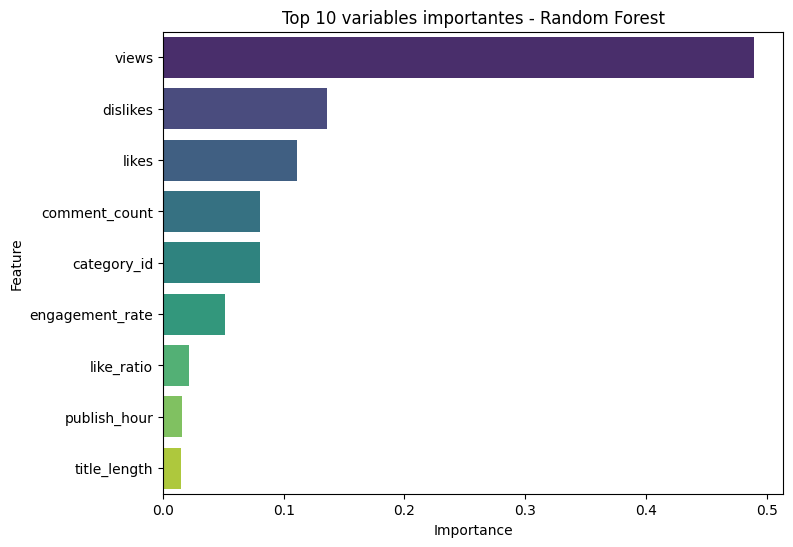

In [164]:
# Visualisation de l'importance des features


plt.figure(figsize=(8,6))
sb.barplot(x='importance', y='feature', data=feature_importance.head(10), palette='viridis')
plt.title("Top 10 variables importantes - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


## Test avec d'autres features

In [165]:
from sklearn.model_selection import train_test_split

# --- Sélection des colonnes utiles (features) ---
others_features = [
    'views', 'likes', 'comment_count', 'engagement_rate',  # colonnes numériques
    'title_length', 'title_word_count', 'has_caps', 'has_numbers',  # text features
    'publish_hour', 'publish_day_of_week', 'publish_month',         # temporelles
    'category_id'  # catégorielle
   
]

X = df_clean[others_features].copy()         # matrice des features (X)
y = df_clean['is_trending'].copy()    # variable cible (y)

# --- Split train/test ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      # 20% test, 80% train
    random_state=42,    # pour reproductibilité
    stratify=y          # conserve la même proportion de trending/non-trending
)

print("Taille train :", X_train.shape)
print("Taille test  :", X_test.shape)


Taille train : (5080, 12)
Taille test  : (1271, 12)


**Standardisation des données (StandardScaler)** 

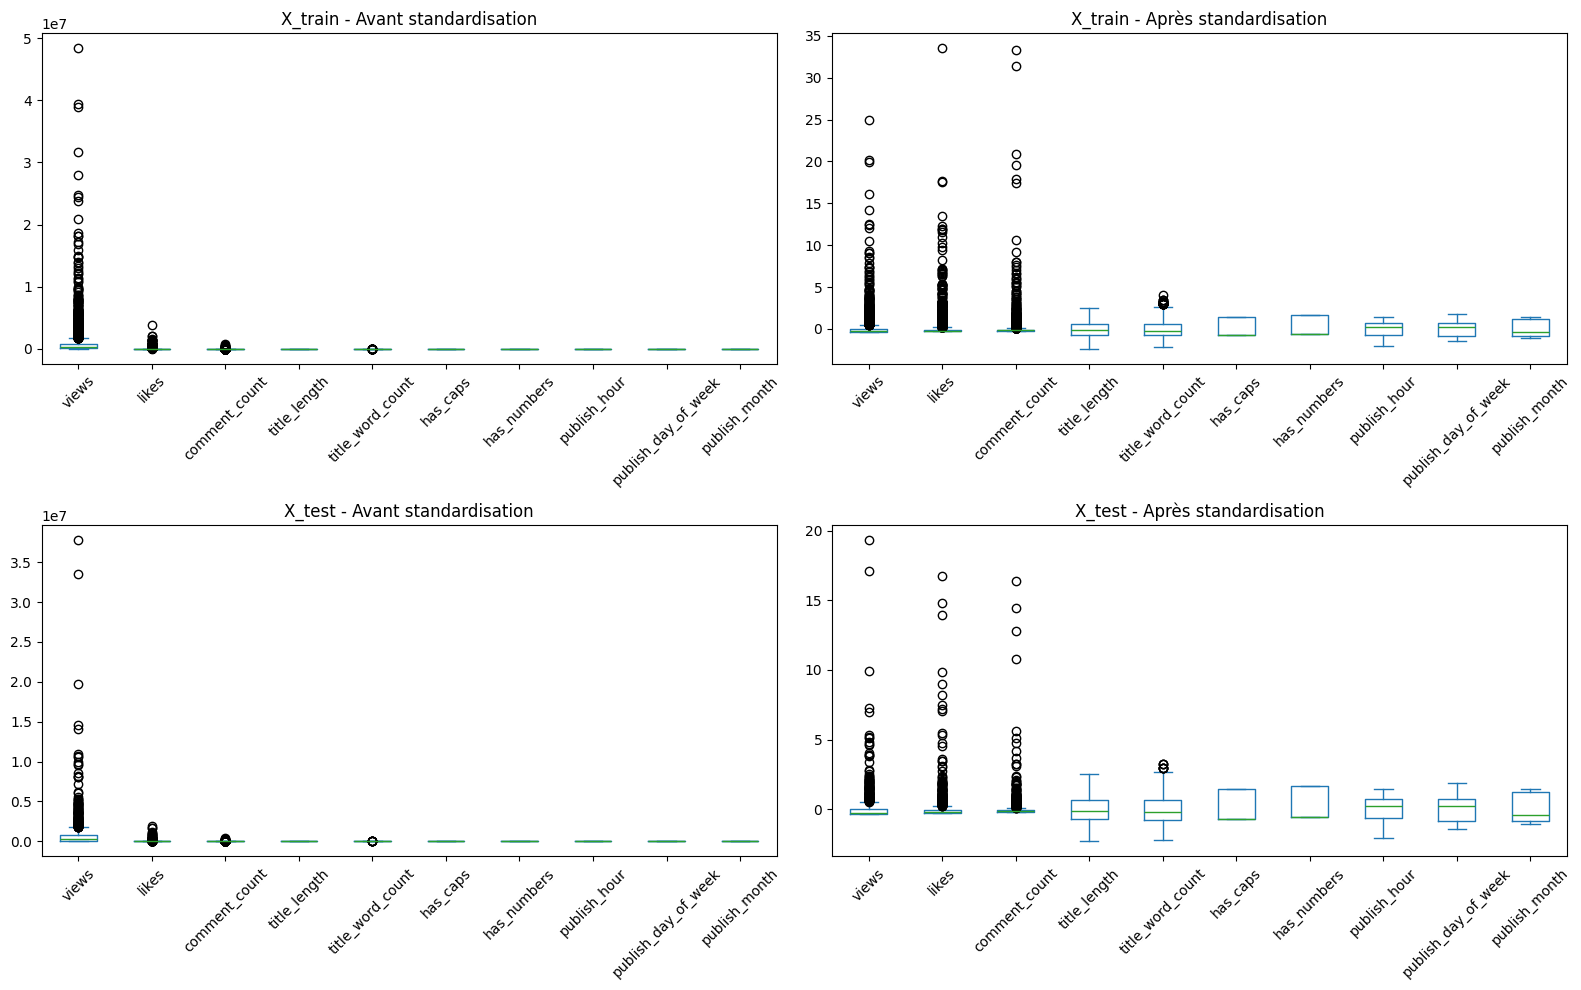

Taille train: (5080, 12)
Taille test: (1271, 12)


In [166]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

# --- Ton code de normalisation ---
scaler = StandardScaler()

num_cols = [ 'views', 'likes', 'comment_count',   # colonnes numériques
    'title_length', 'title_word_count', 'has_caps', 'has_numbers',  # text features
    'publish_hour', 'publish_day_of_week', 'publish_month']         # temporelle

# On garde une copie "avant" pour comparer
X_train_before = X_train[num_cols].copy()
X_test_before = X_test[num_cols].copy()

# Fit uniquement sur le train
scaler.fit(X_train[num_cols])

# Transformation
X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols]  = scaler.transform(X_test[num_cols])

# --- VISUALISATION ---
fig, axes = plt.subplots(2, 2, figsize=(16,10))

# Train avant
X_train_before.plot(kind="box", ax=axes[0,0])
axes[0,0].set_title("X_train - Avant standardisation")
axes[0,0].tick_params(axis='x', rotation=45)

# Train après
X_train[num_cols].plot(kind="box", ax=axes[0,1])
axes[0,1].set_title("X_train - Après standardisation")
axes[0,1].tick_params(axis='x', rotation=45)

# Test avant
X_test_before.plot(kind="box", ax=axes[1,0])
axes[1,0].set_title("X_test - Avant standardisation")
axes[1,0].tick_params(axis='x', rotation=45)

# Test après
X_test[num_cols].plot(kind="box", ax=axes[1,1])
axes[1,1].set_title("X_test - Après standardisation")
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Vérifie les tailles
print(f"Taille train: {X_train.shape}")
print(f"Taille test: {X_test.shape}")



## Entrainement Modèle Random Forest avec d'autres features

In [167]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(
    max_depth= 100,                 # nombre d’arbres dans la forêt
    random_state=42,                # fixe l’aléatoire pour avoir toujours les mêmes résultats quand on relance.
    n_jobs=-1                       # mode mode turbo, tu choisis tous les cœurs du CPU à donner à scikit-learn
)

# Entrainement du modèle
rf_model.fit(X_train, y_train)

"""
Le modèle reçoit :
    X_train = les caractéristiques (features).
    y_train = les vraies étiquettes (0 ou 1).

La forêt construit 100 arbres de décision (par défaut).

Chaque arbre apprend à séparer les vidéos trending des non-trending avec des règles simples comme :
    "Si views > 10000 et like_ratio > 0.8 → trending"
    "Sinon, si comment_count < 50 → pas trending"

Puis la forêt combine les votes de tous les arbres → la majorité gagne.
""" 
# Prédire sur le jeu de test
y_predictions = rf_model.predict(X_test)

**Évaluation avec d'autres features**

Random Forest - Résultats:
Accuracy : 0.9685
Precision: 0.9498
Recall   : 0.8902
F1-Score : 0.9190


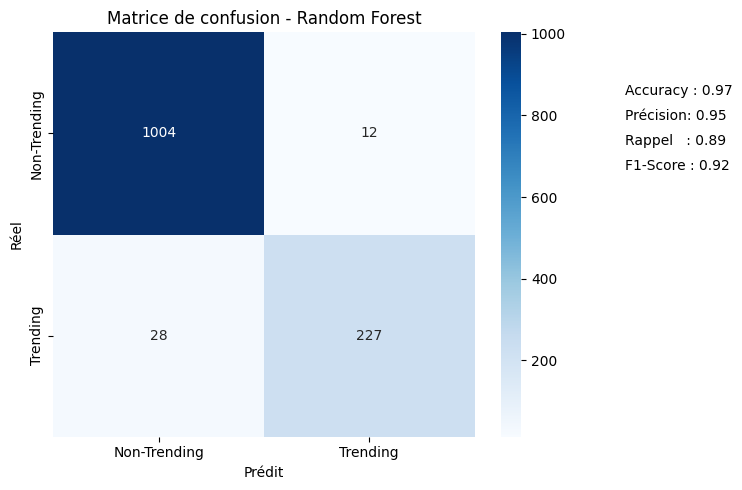

In [168]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix
)

# --- Scores ---
acc = accuracy_score(y_test, y_predictions)
prec = precision_score(y_test, y_predictions)
rec = recall_score(y_test, y_predictions)
f1 = f1_score(y_test, y_predictions)

print("Random Forest - Résultats:")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-Score : {f1:.4f}")

# --- Matrice de confusion ---
cm = confusion_matrix(y_test, y_predictions)

plt.figure(figsize=(6,5))
sb.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Non-Trending", "Trending"],
            yticklabels=["Non-Trending", "Trending"])

plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion - Random Forest")

# --- Ajouter les scores dans la figure ---
plt.figtext(1.05, 0.8, f"Accuracy : {acc:.2f}", fontsize=10)
plt.figtext(1.05, 0.75, f"Précision: {prec:.2f}", fontsize=10)
plt.figtext(1.05, 0.70, f"Rappel   : {rec:.2f}", fontsize=10)
plt.figtext(1.05, 0.65, f"F1-Score : {f1:.2f}", fontsize=10)

plt.tight_layout()
plt.show()

### L'importance des features

In [169]:
# # Importance des variables
feature_importance = (pd.DataFrame({                 # on met les deux listes (features et importances) dans un tableau facile à lire.
     'feature': X.columns,                           # X = df_clean[features].copy() # matrice des features (X) : colonnes choisis précédements
     'importance': rf_model.feature_importances_})   # feature_importances_ est un array numpy qui contient l’importance de chaque feature utilisée par le modèle.
                #array avec un score pour chaque feature : 
                # plus la valeur est élevée → plus la colonne a été utilisée pour prendre des décisions importantes dans la forêt.
                #Les valeurs sont normalisées : la somme = 1.
.sort_values('importance', ascending=False))   # trie du plus important au moins important.

print("\nTop 10 variables importantes:")
display(feature_importance.head(10))


Top 10 variables importantes:


,feature,importance
0,views,0.472100
1,likes,0.178686
2,comment_count,0.136213
3,engagement_rate,0.067446
11,category_id,0.063172
4,title_length,0.018623
8,publish_hour,0.018006
10,publish_month,0.014789
5,title_word_count,0.012778
9,publish_day_of_week,0.011764


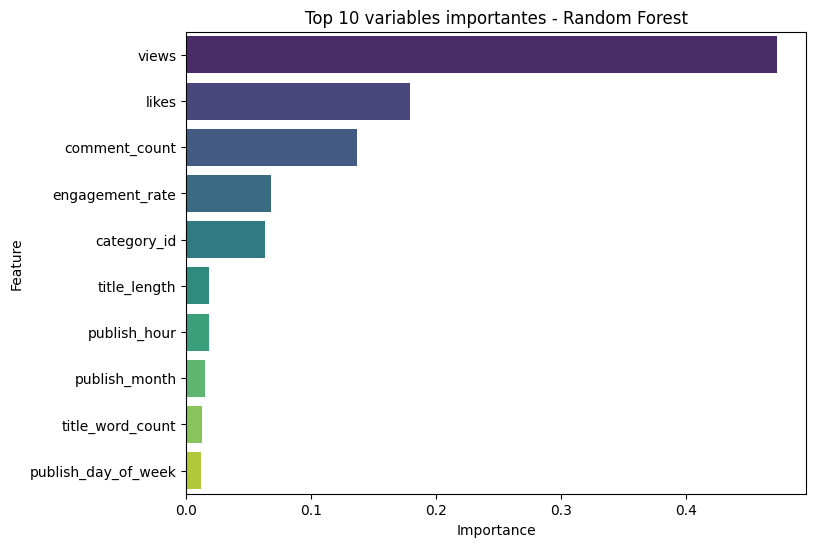

In [170]:
# Visualisation de l'importance des features


plt.figure(figsize=(8,6))
sb.barplot(x='importance', y='feature', data=feature_importance.head(10), palette='viridis')
plt.title("Top 10 variables importantes - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

## 8. Modèle 2 — Support Vector Machine (SVM)

**Consigne 8.1 — Entraînement modèle SVM Kernel linear (utilisant données standardisés)**

In [171]:
from sklearn.svm import SVC

# Créer le modèle
svm_model = SVC(
    kernel="linear",    # type de noyau
    C= 1,               # paramètre de régularisation
    gamma="scale",     # influence d'un point (automatique par défaut)
    random_state=42
)

# Entraîner sur les données
svm_model.fit(X_train, y_train)

# Prédire sur les données de test
y_pred = svm_model.predict(X_test)

**Consigne 8.2 — Évaluation**

SVM - Résultats:
Accuracy : 0.94
Précision: 0.93
Rappel   : 0.78
F1-Score : 0.85


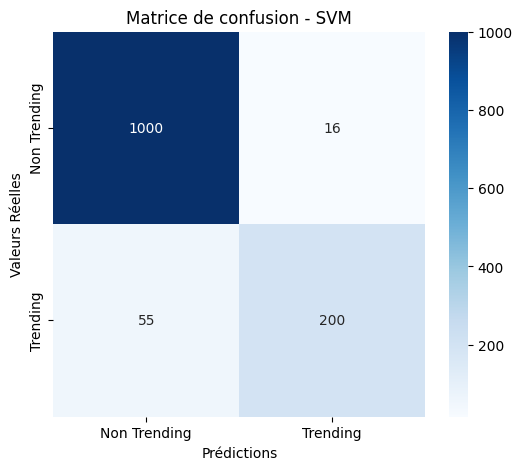

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,  f1_score

# --- Évaluation ---
print("SVM - Résultats:")
print(f"Accuracy : {accuracy_score(y_test, y_pred):.2f}")
print(f"Précision: {precision_score(y_test, y_pred):.2f}")
print(f"Rappel   : {recall_score(y_test, y_pred):.2f}")
print(f"F1-Score : {f1_score(y_test, y_pred):.2f}")

# --- Matrice de confusion ---
cm = confusion_matrix(y_test, y_pred)

# --- Graphique ---
plt.figure(figsize=(6,5))
sb.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Non Trending", "Trending"],
            yticklabels=["Non Trending", "Trending"])
plt.xlabel("Prédictions")
plt.ylabel("Valeurs Réelles")
plt.title("Matrice de confusion - SVM")
plt.show()

# SVM -Linear - Résultats:
# Accuracy : 0.94
# Précision: 0.93
# Rappel   : 0.78
# F1-Score : 0.85

### Comparaiseon des hyperparamètres

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. Définir le modèle de base
svm = SVC(random_state=42)

# 2. Définir la grille d'hyperparamètres
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear','rbf'], # on choisit le noyau
    'gamma': ['scale', 0.1, 1]
}

# 3. Définir les métriques
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

# 4. Lancer GridSearchCV
grid = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    scoring=scoring,
    refit='f1',     # critère pour choisir le "meilleur modèle"
    cv=5,
    n_jobs=-1
)

# 5. Entraînement
grid.fit(X_train, y_train)

# 6. Afficher les meilleurs paramètres
print("Meilleurs paramètres :", grid.best_params_)
print("Meilleur score F1 (moyenne CV) :", grid.best_score_)

# 7. Meilleur modèle entraîné
best_svm = grid.best_estimator_

# 8. Évaluer sur le jeu de test
y_pred = best_svm.predict(X_test)
print("\n--- Évaluation sur le jeu de test ---")
print(f"Accuracy : {accuracy_score(y_test, y_pred):.4f}")
print(f"Précision: {precision_score(y_test, y_pred):.4f}")
print(f"Rappel   : {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score : {f1_score(y_test, y_pred):.4f}")

# 9. Mettre les résultats de la cross-validation dans un DataFrame pandas
results_df = pd.DataFrame(grid.cv_results_)

# Sélectionner et renommer les colonnes utiles
results_df = results_df[
    ['param_C', 'param_kernel', 'param_gamma',
     'mean_test_accuracy', 'mean_test_precision',
     'mean_test_recall', 'mean_test_f1']
].sort_values(by='mean_test_f1', ascending=False)

print("\n--- Résultats complets (moyenne sur CV) ---")
print(results_df)

# (Optionnel) Affichage plus joli avec un arrondi
print("\n--- Résultats arrondis ---")
print(results_df.round(4))



Meilleurs paramètres : {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Meilleur score F1 (moyenne CV) : 0.8751582590495486

--- Évaluation sur le jeu de test ---
Accuracy : 0.9441
Précision: 0.9259
Rappel   : 0.7843
F1-Score : 0.8493

--- Résultats complets (moyenne sur CV) ---
    param_C param_kernel  ... mean_test_recall  mean_test_f1
6       1.0       linear  ...         0.820265      0.875158
8       1.0       linear  ...         0.820265      0.875158
10      1.0       linear  ...         0.820265      0.875158
16     10.0       linear  ...         0.825181      0.873954
14     10.0       linear  ...         0.825181      0.873954
12     10.0       linear  ...         0.825181      0.873954
15     10.0          rbf  ...         0.830093      0.872220
0       0.1       linear  ...         0.784893      0.865075
4       0.1       linear  ...         0.784893      0.865075
2       0.1       linear  ...         0.784893      0.865075
13     10.0          rbf  ...         0.732831     

**Consigne 8.1 — Entraînement (utiliser données normalisées pour RBF et polynomial)**

***Normalisation***

In [174]:
from sklearn.model_selection import train_test_split

# --- Sélection des colonnes utiles (features) ---
normalize_features = [
    'views', 'likes', 'comment_count', 'engagement_rate',  # colonnes numériques
    'title_length', 'title_word_count', 'has_caps', 'has_numbers',  # text features
    'publish_hour', 'publish_day_of_week', 'publish_month',         # temporelles
    'category_id'  # catégorielle
   
]

X = df_clean[normalize_features].copy()         # matrice des features (X)
y = df_clean['is_trending'].copy()    # variable cible (y)

# --- Split train/test ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      # 20% test, 80% train
    random_state=42,    # pour reproductibilité
    stratify=y          # conserve la même proportion de trending/non-trending
)

print("Taille train :", X_train.shape)
print("Taille test  :", X_test.shape)

Taille train : (5080, 12)
Taille test  : (1271, 12)


***Visualisation des données normalisées***

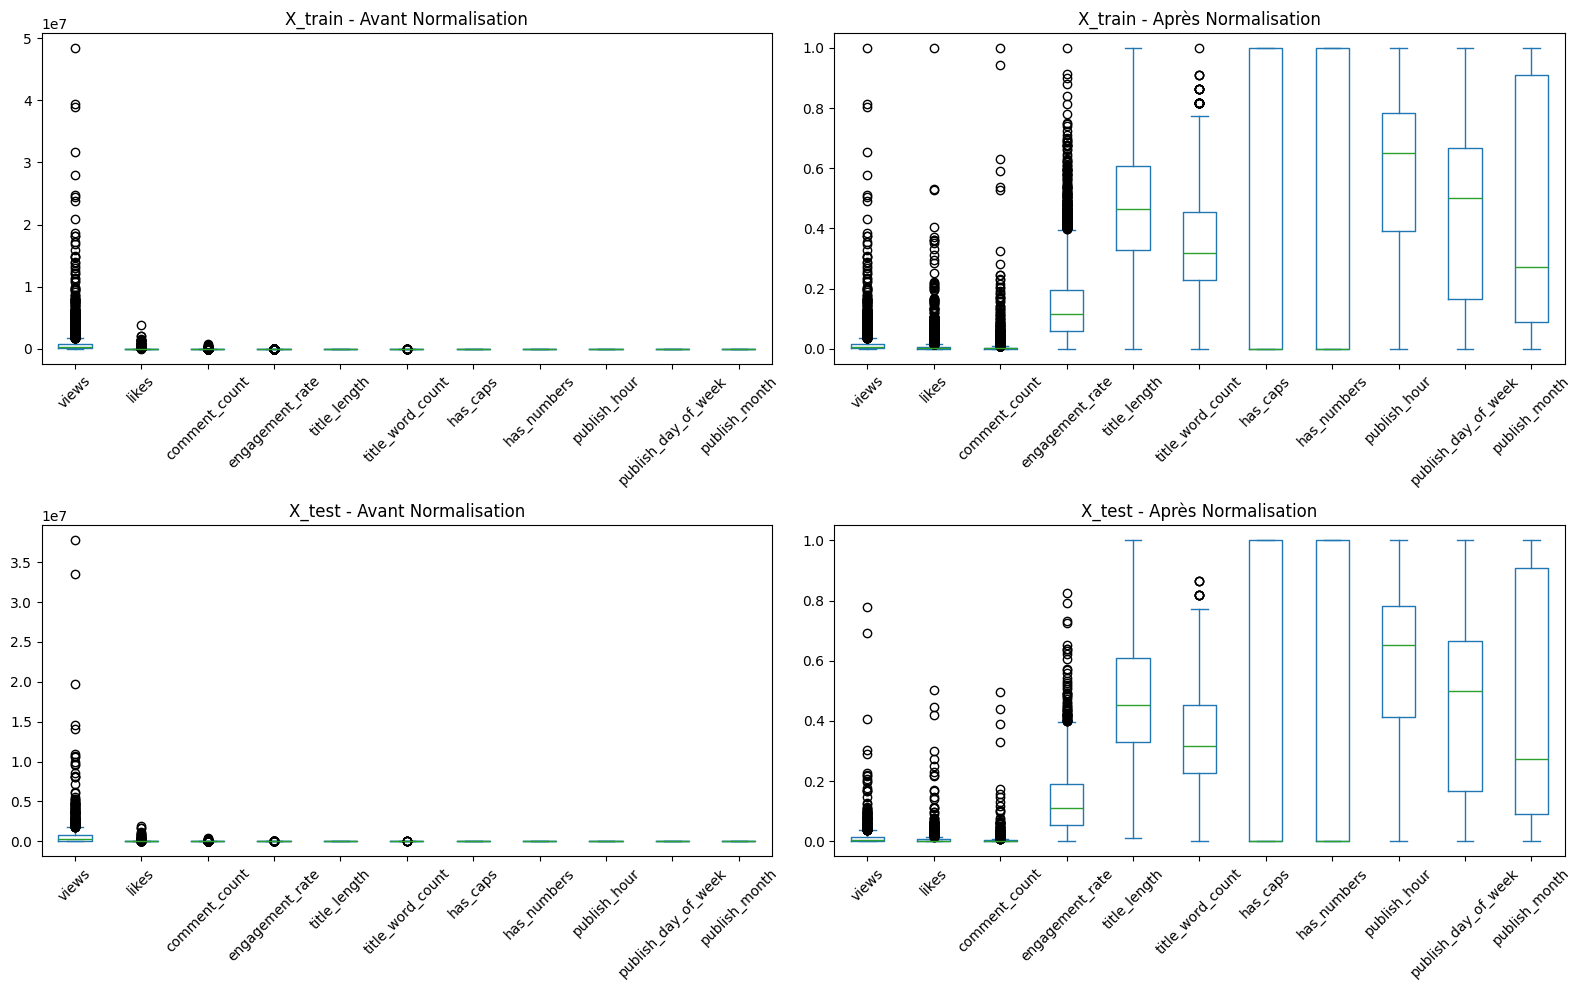

Taille train: (5080, 12)
Taille test: (1271, 12)


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# --- Ton code de normalisation ---
scaler = MinMaxScaler()

num_cols = [ 'views', 'likes', 'comment_count','engagement_rate',   # colonnes numériques
    'title_length', 'title_word_count', 'has_caps', 'has_numbers',  # text features
    'publish_hour', 'publish_day_of_week', 'publish_month']         # temporelle

# On garde une copie "avant" pour comparer
X_train_before = X_train[num_cols].copy()
X_test_before = X_test[num_cols].copy()

# Fit uniquement sur le train
scaler.fit(X_train[num_cols])

# Transformation
X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols]  = scaler.transform(X_test[num_cols])

# --- VISUALISATION ---
fig, axes = plt.subplots(2, 2, figsize=(16,10))

# Train avant
X_train_before.plot(kind="box", ax=axes[0,0])
axes[0,0].set_title("X_train - Avant Normalisation")
axes[0,0].tick_params(axis='x', rotation=45)

# Train après
X_train[num_cols].plot(kind="box", ax=axes[0,1])
axes[0,1].set_title("X_train - Après Normalisation")
axes[0,1].tick_params(axis='x', rotation=45)

# Test avant
X_test_before.plot(kind="box", ax=axes[1,0])
axes[1,0].set_title("X_test - Avant Normalisation")
axes[1,0].tick_params(axis='x', rotation=45)

# Test après
X_test[num_cols].plot(kind="box", ax=axes[1,1])
axes[1,1].set_title("X_test - Après Normalisation")
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Vérifie les tailles
print(f"Taille train: {X_train.shape}")
print(f"Taille test: {X_test.shape}")



**Consigne 8.1 — Entraînement modèle SVM Kernel poly (utilisant données standardisés)**

In [204]:
svm_model = SVC(
    kernel='linear', #noyau
    C=10
)

svm_model.fit(X_train, y_train)

y_predict = svm_model.predict(X_test)

**Consigne 8.2 — Évaluation**

SVM - Résultats:
Accuracy : 0.93
Précision: 0.97
Rappel   : 0.65
F1-Score : 0.78


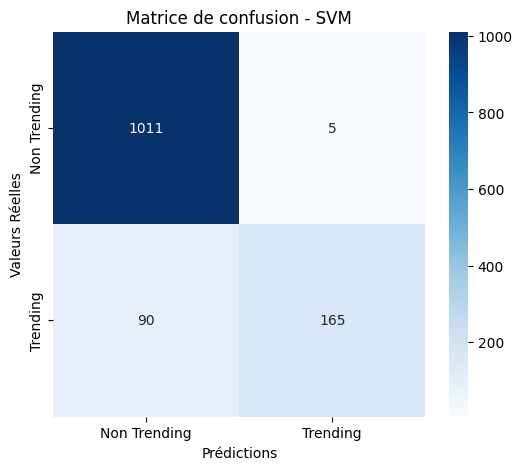

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,  f1_score

# --- Évaluation ---
print("SVM - Résultats:")
print(f"Accuracy : {accuracy_score(y_test, y_pred):.2f}")
print(f"Précision: {precision_score(y_test, y_pred):.2f}")
print(f"Rappel   : {recall_score(y_test, y_pred):.2f}")
print(f"F1-Score : {f1_score(y_test, y_pred):.2f}")

# --- Matrice de confusion ---
cm = confusion_matrix(y_test, y_pred)

# --- Graphique ---
plt.figure(figsize=(6,5))
sb.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Non Trending", "Trending"],
            yticklabels=["Non Trending", "Trending"])
plt.xlabel("Prédictions")
plt.ylabel("Valeurs Réelles")
plt.title("Matrice de confusion - SVM")
plt.show()

#SVM -Poly standardisé Résultats: 
#Accuracy : 0.94
#Précision: 0.93
#Rappel   : 0.78
#F1-Score : 0.85                

# SVM -Linear standardisé - Résultats:
# Accuracy : 0.94
# Précision: 0.93
# Rappel   : 0.78
# F1-Score : 0.85

# SVM - Linear normaliisé- C=1.0 Résultats:
# Accuracy : 0.94
# Précision: 0.93
# Rappel   : 0.78
# F1-Score : 0.85

# SVM -Linear normaliisé- C=10 Résultats:
# Accuracy : 0.93
# Précision: 0.97
# Rappel   : 0.65
# F1-Score : 0.78

# SVM - rbf normalisé - Résultats:
# Accuracy : 0.93
# Précision: 0.97
# Rappel   : 0.65
# F1-Score : 0.78


### Comparaison des hyperparametres

In [212]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. Définir le modèle de base
svm = SVC(random_state=42)

# 2. Définir la grille d'hyperparamètres
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear','rbf'], # on choisit le noyau
    'gamma': ['scale', 0.1, 1]
}

# 3. Définir les métriques
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

# 4. Lancer GridSearchCV
grid = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    scoring=scoring,
    refit='f1',     # critère pour choisir le "meilleur modèle"
    cv=5,
    n_jobs=-1
)

# 5. Entraînement
grid.fit(X_train, y_train)

# 6. Afficher les meilleurs paramètres
print("Meilleurs paramètres :", grid.best_params_)
print("Meilleur score F1 (moyenne CV) :", grid.best_score_)

# 7. Meilleur modèle entraîné
best_svm = grid.best_estimator_

# 8. Évaluer sur le jeu de test
y_pred = best_svm.predict(X_test)
print("\n--- Évaluation sur le jeu de test ---")
print(f"Accuracy : {accuracy_score(y_test, y_pred):.4f}")
print(f"Précision: {precision_score(y_test, y_pred):.4f}")
print(f"Rappel   : {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score : {f1_score(y_test, y_pred):.4f}")

# 9. Mettre les résultats de la cross-validation dans un DataFrame pandas
results_df = pd.DataFrame(grid.cv_results_)

# Sélectionner et renommer les colonnes utiles
results_df = results_df[
    ['param_C', 'param_kernel', 'param_gamma',
     'mean_test_accuracy', 'mean_test_precision',
     'mean_test_recall', 'mean_test_f1']
].sort_values(by='mean_test_f1', ascending=False)

print("\n--- Résultats complets (moyenne sur CV) ---")
print(results_df)

# (Optionnel) Affichage plus joli avec un arrondi
print("\n--- Résultats arrondis ---")
print(results_df.round(4))

# Meilleurs paramètres : {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
# Meilleur score F1 (moyenne CV) : 0.8033002461447841

# --- Évaluation sur le jeu de test ---
# Accuracy : 0.9253
# Précision: 0.9706
# Rappel   : 0.6471
# F1-Score : 0.7765

# Meilleurs paramètres : {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
# Meilleur score F1 (moyenne CV) : 0.531252155150564

# --- Évaluation sur le jeu de test ---
# Accuracy : 0.8552
# Précision: 0.7934
# Rappel   : 0.3765
# F1-Score : 0.5106




Meilleurs paramètres : {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Meilleur score F1 (moyenne CV) : 0.8033002461447841

--- Évaluation sur le jeu de test ---
Accuracy : 0.9253
Précision: 0.9706
Rappel   : 0.6471
F1-Score : 0.7765

--- Résultats complets (moyenne sur CV) ---
    param_C param_kernel  ... mean_test_recall  mean_test_f1
16     10.0       linear  ...         0.678808      0.803300
14     10.0       linear  ...         0.678808      0.803300
12     10.0       linear  ...         0.678808      0.803300
17     10.0          rbf  ...         0.401830      0.531252
8       1.0       linear  ...         0.277031      0.433143
6       1.0       linear  ...         0.277031      0.433143
10      1.0       linear  ...         0.277031      0.433143
15     10.0          rbf  ...         0.194499      0.324446
11      1.0          rbf  ...         0.051087      0.096652
0       0.1       linear  ...         0.028480      0.055305
4       0.1       linear  ...         0.028480    

## 1️⃣ Kernel linéaire (kernel='linear')

Imagine que tu traces une ligne droite pour séparer tes données.

Quand l’utiliser :
Si tes données peuvent être séparées à peu près par une ligne droite (ou un plan pour plusieurs dimensions).

Avantages :

- Rapide à calculer.

- Peu de réglages à faire.

- Moins de risque de « surapprendre » sur tes données (plus stable).

Inconvénients :

- Si la relation entre tes données et la cible est courbée ou complexe, il ne pourra pas bien s’adapter.

## 2️⃣ Kernel RBF (kernel='rbf')

Imagine que tu utilises un élastique pour entourer des points : il peut se plier et suivre les formes complexes de tes données.

Quand l’utiliser :
- Si tes données ont des formes non linéaires, que la séparation n’est pas une simple ligne.

Avantages :

- Très flexible : peut s’adapter à presque toutes les formes.

- Peut améliorer beaucoup les performances si la relation est compliquée.

Inconvénients :

- Plus lent à calculer.

- Plus sensible aux réglages (C et gamma).

- Peut « surapprendre » si mal réglé (le modèle colle trop aux données d’entraînement).

## 3️⃣ Kernel polynomial (kernel='poly')

Imagine que tu dessines une courbe simple (parabolique, cubique, etc.) pour séparer les points.

Quand l’utiliser :
- Si tu penses que la relation suit une formule polynomiale (ex : carré ou cube des valeurs).

Avantages :

- Capture des relations un peu plus complexes que linéaire, mais pas trop.

- Moins flexible que RBF, plus flexible que linéaire.

Inconvénients :

- Si le degré du polynôme est trop élevé, ça devient instable et lent.

- Moins utilisé que RBF en pratique.

### Conclusion 

 Les performances ne changent pas entre données standardisées et normalisées pour un kernel linéaire.

 Pour ce dataset, pas besoin de kernels non linéaires (poly ou rbf), car ils n’améliorent pas les scores et prennent beaucoup plus de temps.

 C=10 offre un bon compromis entre précision et régularisation.

## 9. Modèle 3 — Gradient Boosting (XGBoost)

**Installation de la librairie XGBoost**

In [215]:
!pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 MB 12.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.5/322.5 MB 5.7 MB/s eta 0:00:00:00:0100:01


**Consigne 9.1 — Entraînement**

In [216]:
# VOTRE CODE ICI - Section 9.1

try:
    from xgboost import XGBClassifier
    xgb_model = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, subsample=1.0, colsample_bytree=1.0, random_state=42, n_jobs=-1, eval_metric='logloss')
    xgb_model.fit(X_train, y_train)
    xgb_predictions = xgb_model.predict(X_test)
except ImportError:
    print("XGBoost n'est pas installé. Installez avec: pip install xgboost")
    xgb_model = None
    xgb_predictions = None

**Les hyperparamètres principaux :**

Il y en a beaucoup, mais voici les plus importants 

n_estimators :

- Nombre d’arbres.

- Plus grand = meilleur, mais risque d’overfitting et plus lent.

max_depth :

- Profondeur max des arbres.

- Grand = plus complexe, petit = plus simple.

learning_rate (η) :

- Poids donné à chaque nouvel arbre.

- Petit = plus lent mais plus précis.

subsample :

- Proportion d’échantillons utilisés par arbre (ex: 0.8 = 80%).

- Introduit du hasard pour éviter le surapprentissage.

colsample_bytree :

- Proportion de features utilisées par arbre.

- Comme dans Random Forest → plus de diversité.

eval_metric :

- Métrique à optimiser (logloss, error, auc, etc.).

**Consigne 9.2 — Évaluation**

XGBoost - Résultats:
Accuracy : 0.9913
Précision: 1.0000
Rappel   : 0.9569
F1-Score : 0.9780


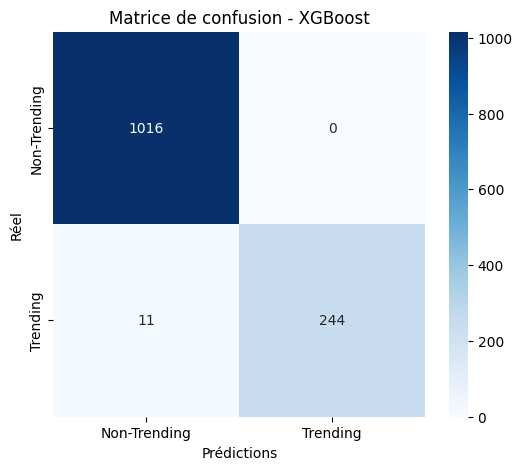

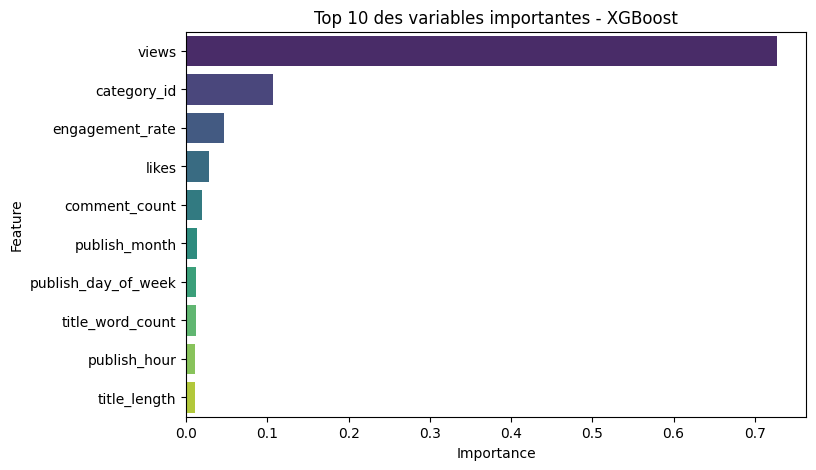

In [218]:
# VOTRE CODE ICI - Section 9.2
if xgb_predictions is not None:

# --- Évaluation du modèle ---
    print("XGBoost - Résultats:")
    print(f"Accuracy : {accuracy_score(y_test, xgb_predictions):.4f}")
    print(f"Précision: {precision_score(y_test, xgb_predictions):.4f}")
    print(f"Rappel   : {recall_score(y_test, xgb_predictions):.4f}")
    print(f"F1-Score : {f1_score(y_test, xgb_predictions):.4f}")

    # --- Matrice de confusion ---
    cm = confusion_matrix(y_test, xgb_predictions)
    plt.figure(figsize=(6, 5))
    sb.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Trending", "Trending"], yticklabels=["Non-Trending", "Trending"])
    plt.xlabel("Prédictions")
    plt.ylabel("Réel")
    plt.title("Matrice de confusion - XGBoost")
    plt.show()

    # --- Importance des variables ---
    feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': xgb_model.feature_importances_
    }).sort_values(by="Importance", ascending=False)

    plt.figure(figsize=(8, 5))
    sb.barplot(data=feature_importance.head(10), x="Importance", y="Feature", palette="viridis")
    plt.title("Top 10 des variables importantes - XGBoost")
    plt.show()

## 10. Modèle 4 — Réseau de Neurones (MLPClassifier)

**Consigne 10.1 — Entraînement (données normalisées)**

In [179]:
# VOTRE CODE ICI - Section 10.1
# from sklearn.neural_network import MLPClassifier
# nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000, random_state=42)
# nn_model.fit(X_train_scaled, y_train)
# nn_predictions = nn_model.predict(X_test_scaled)

**Consigne 10.2 — Évaluation**

In [180]:
# VOTRE CODE ICI - Section 10.2
# print("Réseau de Neurones - Résultats:")
# ....
# print(f"Precision: {precision_score(y_test, nn_predictions):.4f}")
# print(f"Recall: {recall_score(y_test, nn_predictions):.4f}")
# print(f"F1-Score: {f1_score(y_test, nn_predictions):.4f}")
# # Nombre d'itérations
# # ....

## 11. Comparaison des modèles

In [181]:
# VOTRE CODE ICI - Section 11.1
# import pandas as pd
# results = []
# # Remplir en fonction des métriques calculées plus haut
# # results.append({'Model': 'Random Forest', 'Accuracy': ..., 'Precision': ..., 'Recall': ..., 'F1-Score': ...})
# # results.append({'Model': 'SVM', 'Accuracy': ..., 'Precision': ..., 'Recall': ..., 'F1-Score': ...})
# # if xgb_predictions is not None: results.append({'Model': 'XGBoost', 'Accuracy': ..., 'Precision': ..., 'Recall': ..., 'F1-Score': ...})
# # results.append({'Model': 'Neural Network', 'Accuracy': ..., 'Precision': ..., 'Recall': ..., 'F1-Score': ...})
# results_df = pd.DataFrame(results)
# display(results_df)
# # Graphique comparatif des F1-scores (optionnel)
# # import matplotlib.pyplot as plt
# # plt.figure()
# # plt.bar(results_df['Model'], results_df['F1-Score'])
# # plt.title('Comparaison des F1-scores')
# # plt.ylabel('F1-Score')
# # plt.show()

## 12. Validation croisée

In [182]:
# VOTRE CODE ICI - Section 12.1
# from sklearn.model_selection import cross_val_score
# # Exemple avec Random Forest (remplacez par votre meilleur modèle)
# # scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='f1', n_jobs=-1)
# # print(f"Validation croisée - F1-Score: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

## 13. Optimisation des hyperparamètres (Grid Search)

In [183]:
# VOTRE CODE ICI - Section 13.1
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [5, 10, None],
#     'min_samples_split': [2, 5, 10]
# }
# grid_search = GridSearchCV(
#     RandomForestClassifier(random_state=42),
#     param_grid,
#     cv=3,
#     scoring='f1',
#     n_jobs=-1
# )
# grid_search.fit(X_train, y_train)
# print("Meilleurs paramètres:", grid_search.best_params_)
# print("Meilleur score CV:", grid_search.best_score_)
# best_rf = grid_search.best_estimator_
# best_rf_pred = best_rf.predict(X_test)

## 14. Analyse des erreurs

In [184]:
# VOTRE CODE ICI - Section 14.1
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import confusion_matrix
# # Exemple: matrice de confusion pour le meilleur modèle (remplacez best_rf_pred)
# # cm = confusion_matrix(y_test, best_rf_pred)
# # plt.figure(figsize=(8, 6))
# # sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
# #             xticklabels=['Non-Trending', 'Trending'],
# #             yticklabels=['Non-Trending', 'Trending'])
# # plt.title('Matrice de Confusion - Meilleur Modèle')
# # plt.ylabel('Valeurs Réelles')
# # plt.xlabel('Prédictions')
# # plt.show()

In [185]:
# VOTRE CODE ICI - Section 14.2
# # Identifier des exemples mal classifiés (adapter selon le modèle choisi)
# # errors_mask = (y_test != best_rf_pred)
# # error_indices = X_test[errors_mask].index
# # print("Exemples de vidéos mal classifiées:")
# # for idx in list(error_indices)[:5]:
# #     real_label = y_test.loc[idx]
# #     predicted_label = best_rf_pred[list(error_indices).index(idx)]  # à adapter si nécessaire
# #     print(f"Index {idx}: Réel={real_label}, Prédit={predicted_label}")

## 15. Sauvegarde & conclusions

In [186]:
# VOTRE CODE ICI - Section 15.1
# import joblib
# # Remplacez 'best_rf' / 'scaler' par vos objets
# # joblib.dump(best_model, 'best_youtube_classifier.pkl')
# # joblib.dump(scaler, 'feature_scaler.pkl')
# # print("Modèle et scaler sauvegardés avec succès!")

### Conclusions à rédiger

1. **Meilleur modèle**  
   - Modèle: *[À compléter]*  
   - Performances: *[À compléter]*  
   - Raisons: *[À compléter]*

2. **Variables les plus importantes**  
   - *[À compléter]*

3. **Limitations**  
   - *[À compléter]*

4. **Améliorations suggérées**  
   - *[À compléter]*

5. **Apprentissages**  
   - *[À compléter]*

---
## Guide de testing pour les étudiants

**Comment tester vos implémentations :**
1. **Vérifications de base** : `.shape`, `.info()`, `.head()`  
2. **Validation des features** : pas de NaN, ratios entre 0 et 1, plages temporelles correctes  
3. **Validation des modèles** : prédictions binaires {0,1}, longueurs cohérentes, comparaisons rigoureuses  
4. **Tests de cohérence** : scores réalistes, F1 entre précision et rappel, impact de la normalisation  
5. **Debugging** : augmenter `max_iter` si nécessaire, vérifier entrées/sorties et dimensions